In [2]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os

In [3]:
DIRNAME = os.path.dirname(os.getcwd())
IMG_PATH = os.path.join(DIRNAME,"data")
IMG_ANNOTATION_PATH = os.path.join(DIRNAME,"data_clean.csv")

In [4]:
dataset = pd.read_csv(IMG_ANNOTATION_PATH,sep=",")

In [5]:
dataset

,image_label,nb_coins,value,units,cents
0,006.jpeg,23,3 euros 32 centimes,3,32
1,007.jpeg,23,3 euros 32 centimes,3,32
2,008.jpeg,14,1 euro 66 centimes,1,66
3,009.jpeg,14,1 euro 66 centimes,1,66
4,010.jpeg,10,1 euro 19 centimes,1,19
...,...,...,...,...,...
77,PXL_20240206_141524308.jpg,1,1 euro,1,0
78,PXL_20240206_141535905.jpg,3,3 euros 20 centimes,3,20
79,PXL_20240206_141545421.jpg,6,4 euros 80 centimes,4,80
80,PXL_20240206_231416015.jpg,4,35 centimes,0,35


In [6]:
dataset = dataset.rename(columns={'Nom image': 'image_label', 'Nombre de pièces': 'nb_coins', 'Valeur ': 'value'})

In [7]:
split_values = dataset['value'].str.split().tolist()
values_dict_list = []
for value in split_values:
    if len(value) > 2 :
        values_dict_list.append({"units":value[0],"cents":value[2]})
    elif len(value) == 2 :
        if "euro" in value[1]:
            values_dict_list.append({"units":value[0],"cents":0})
        elif "cent" in value[1]:
            values_dict_list.append({"units":0,"cents":value[0]})



In [8]:
values_df = pd.DataFrame(values_dict_list)
values_df

,units,cents
0,3,32
1,3,32
2,1,66
3,1,66
4,1,19
...,...,...
77,1,0
78,3,20
79,4,80
80,0,35


In [9]:
dataset = pd.concat([dataset, values_df], axis=1)

In [10]:
dataset.to_csv("data_clean.csv", index=False)

In [11]:
def read_images():
    images = {}
    for filename in os.listdir(IMG_PATH):
        img = cv2.imread(os.path.join(IMG_PATH, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images[filename] = img
        else:
            print("Error with file", filename)
    return images

In [12]:
images = read_images()


In [ ]:
img = images["IMG_1643.JPG"]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(512,512),interpolation=cv2.INTER_AREA)

In [14]:
dataset

,image_label,nb_coins,value,units,cents,units,cents
0,006.jpeg,23,3 euros 32 centimes,3,32,3,32
1,007.jpeg,23,3 euros 32 centimes,3,32,3,32
2,008.jpeg,14,1 euro 66 centimes,1,66,1,66
3,009.jpeg,14,1 euro 66 centimes,1,66,1,66
4,010.jpeg,10,1 euro 19 centimes,1,19,1,19
...,...,...,...,...,...,...,...
77,PXL_20240206_141524308.jpg,1,1 euro,1,0,1,0
78,PXL_20240206_141535905.jpg,3,3 euros 20 centimes,3,20,3,20
79,PXL_20240206_141545421.jpg,6,4 euros 80 centimes,4,80,4,80
80,PXL_20240206_231416015.jpg,4,35 centimes,0,35,0,35


In [15]:
annotation = dataset[dataset["image_label"] == "IMG_5953.jpeg"]

In [16]:
annotation

,image_label,nb_coins,value,units,cents,units,cents


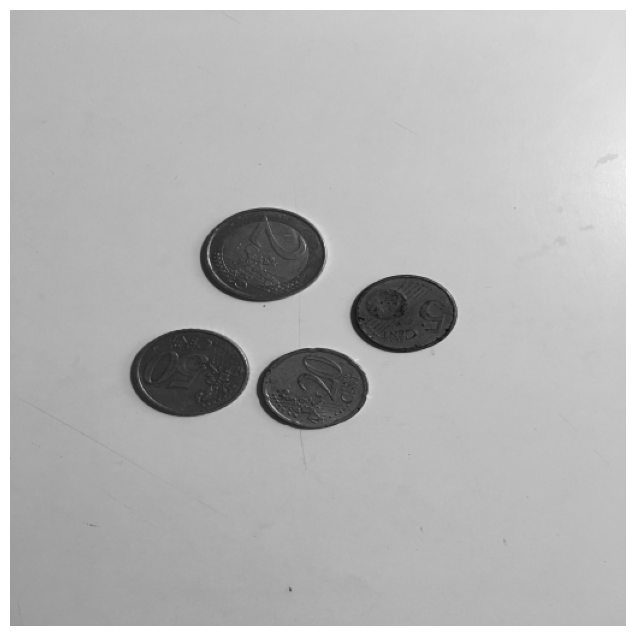

In [17]:
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [19]:
blurred = cv2.GaussianBlur(gray, (5, 5), 2)

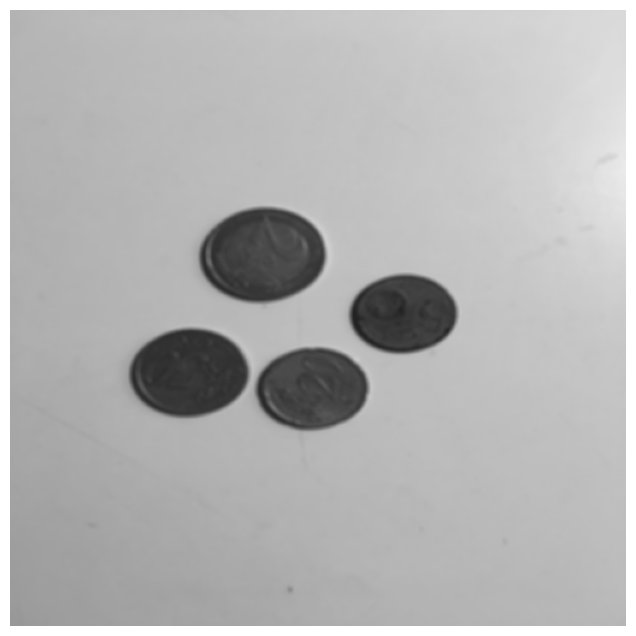

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

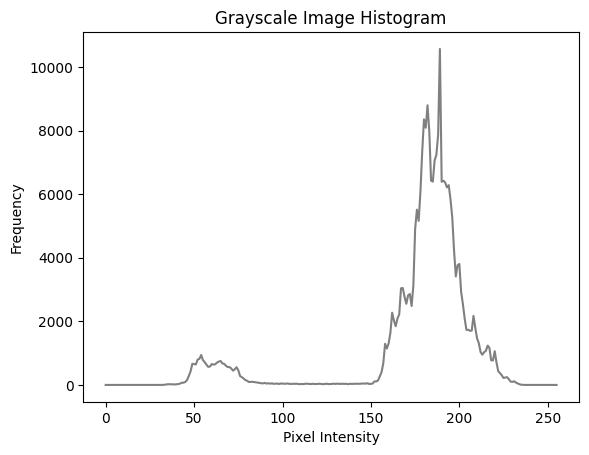

In [21]:
histogram = cv2.calcHist([blurred], [0], None, [256], [0, 256])

plt.plot(histogram, color='gray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Grayscale Image Histogram')
plt.show()

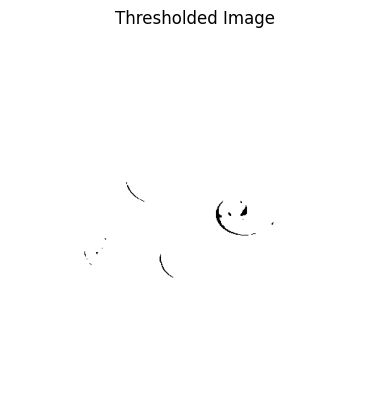

In [22]:
_, thresholded_image = cv2.threshold(blurred, 45, 185, cv2.THRESH_BINARY)

plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

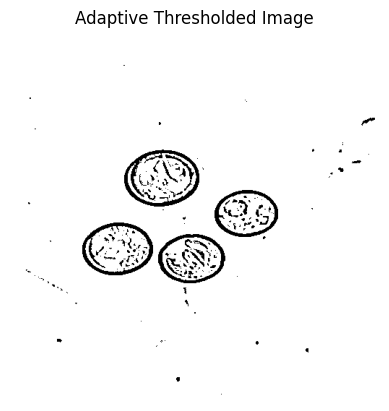

In [23]:
adaptive_thresholded_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(adaptive_thresholded_image, cmap='gray')
plt.title('Adaptive Thresholded Image')
plt.axis('off')
plt.show()

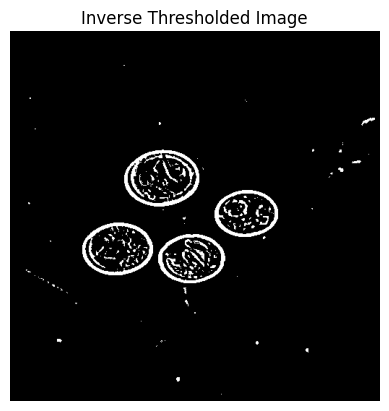

In [24]:
inverse_thresholded_image = cv2.bitwise_not(adaptive_thresholded_image)

plt.imshow(inverse_thresholded_image, cmap='gray')
plt.title('Inverse Thresholded Image')
plt.axis('off')
plt.show()

In [25]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

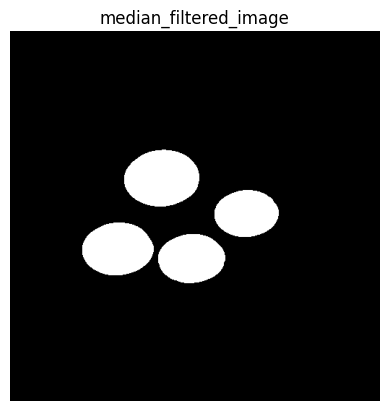

In [26]:
median_filtered_image = cv2.medianBlur(thresh, 5)

plt.imshow(median_filtered_image, cmap='gray')
plt.title('median_filtered_image')
plt.axis('off')
plt.show()

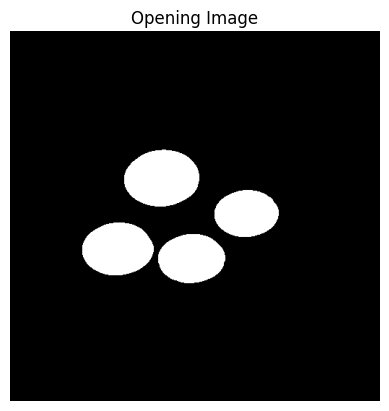

In [27]:
kernel_size = 5  

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

opening_image = cv2.morphologyEx(median_filtered_image, cv2.MORPH_OPEN, kernel)

plt.imshow(opening_image, cmap='gray')
plt.title('Opening Image')
plt.axis('off')
plt.show()

In [28]:
bg = cv2.dilate(opening_image,kernel,iterations=2)
dist_transform = cv2.distanceTransform(opening_image,cv2.DIST_L2,5)

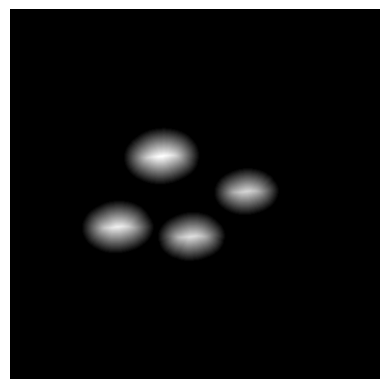

In [29]:
plt.imshow(dist_transform, cmap='gray')
plt.axis('off')
plt.show()

In [30]:
ret, fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

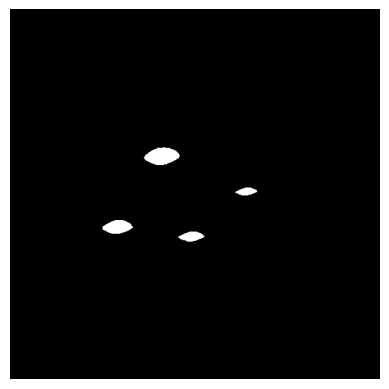

In [31]:
plt.imshow(fg, cmap='gray')
plt.axis('off')
plt.show()

In [32]:
fg = np.uint8(fg)
unknown = cv2.subtract(bg,fg)

In [33]:
# Marker labelling
ret, markers = cv2.connectedComponents(fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

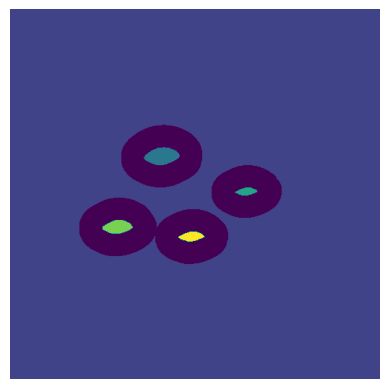

In [34]:
plt.imshow(markers)
plt.axis('off')
plt.show()

In [35]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

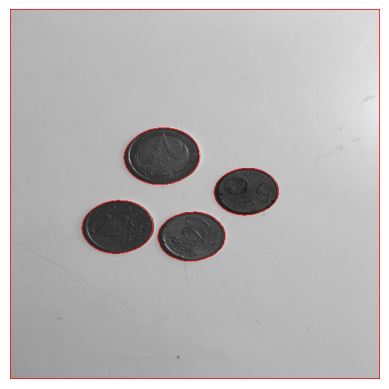

In [36]:
plt.imshow(img)
plt.axis('off')
plt.show()

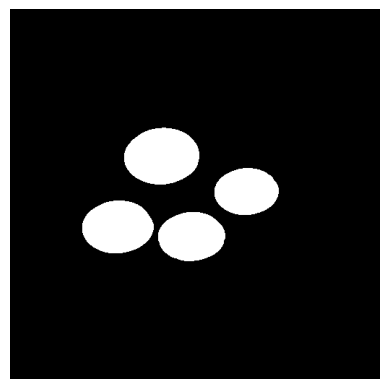

In [37]:
closing_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
processed_image = cv2.morphologyEx(median_filtered_image, cv2.MORPH_CLOSE, closing_kernel)
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()

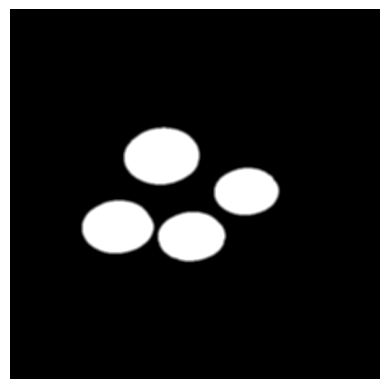

In [38]:
filtered_image = cv2.blur(processed_image, (5,5))
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

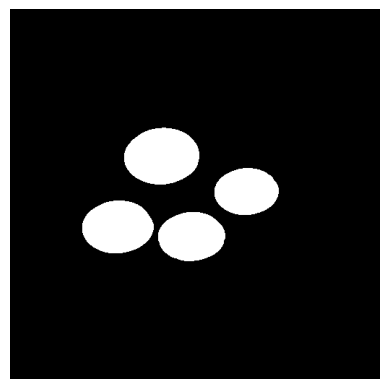

In [42]:
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()

[[[138.75 303.75  37.05]
  [318.75 252.75  32.25]]]


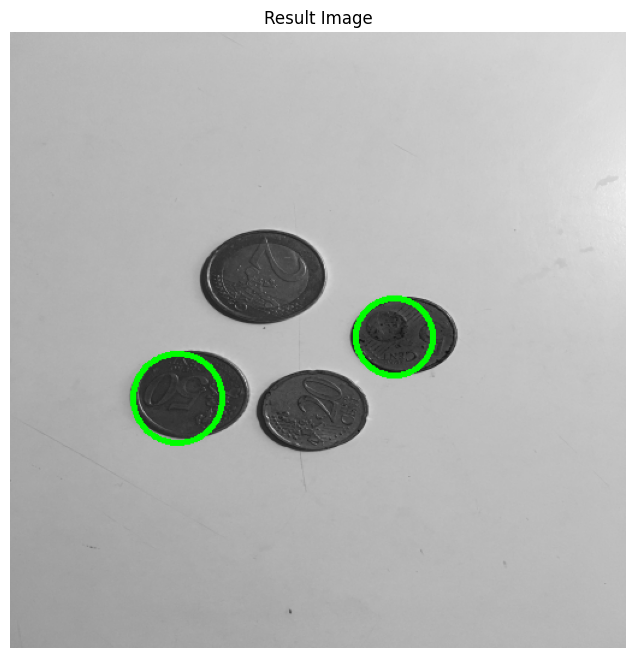

In [59]:
circles = cv2.HoughCircles(processed_image, cv2.HOUGH_GRADIENT, dp=1.5, minDist=60,
                           param1=50, param2=30, minRadius=30, maxRadius=100)
print(circles)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 4)

plt.figure(figsize=(8, 8)) 

plt.imshow(img)
plt.title('Result Image')
plt.axis('off')
plt.show()

In [4]:
from lib.detector import pretreat, segment_with_watershed
from lib.utils import read_images
import cv2
import numpy as np

In [7]:
def train(images):
    for image in images:
        res = pretreat(image)
        markers, num_regions = segment_with_watershed(res)
        

In [8]:
image_dataset = read_images()
image_list = list(image_dataset.values())[6:7]
train(image_list)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4096 but corresponding boolean dimension is 512

In [3]:
# import the necessary packages
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import numpy as np
import argparse
import imutils
import cv2


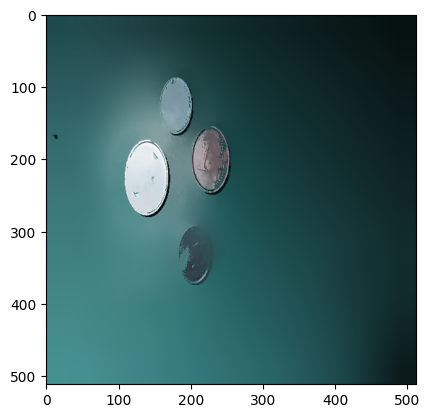

In [54]:
image = cv2.imread(r"C:\Users\khell\Desktop\vmi2024\intro_image\projet\CoinCounter\data\IMG_20240206_213214.jpg")
image = cv2.resize(image,(512,512),interpolation=cv2.INTER_AREA)
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
plt.imshow(shifted)

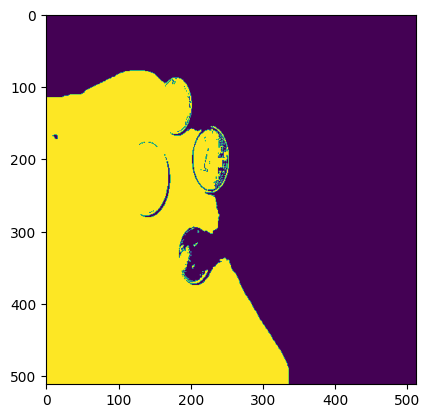

In [55]:
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

In [51]:
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D,labels=thresh,min_distance=50)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
mask = np.zeros(D.shape, dtype=bool)
mask[tuple(localMax.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 7 unique segments found


In [52]:
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 5)
	cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

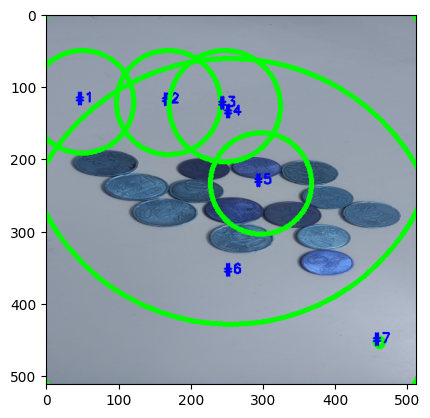

In [53]:
plt.imshow(image)